<a href="https://colab.research.google.com/github/kanishk-kadam/web-development-with-harry-potter/blob/main/Predict_Car_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [54]:
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [6]:
#Loading the data
car_dataset=   pd.read_csv("/content/car data.csv")

In [7]:
#importing the first row of car dataset
car_dataset.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [8]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [9]:
# Getting some iformation about datset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
#checking number of missing values
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [11]:
#check distribution of catagorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the Categorical Data

In [12]:
#convert Text data into numerical data
# Encoding the Categorical Data
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)#for Fuel_Type
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)#for Seller_Type
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)#for Transmission

/tmp/ipython-input-12-655458176.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)#for Fuel_Type
/tmp/ipython-input-12-655458176.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)#for Seller_Type
/tmp/ipython-input-12-655458176.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly

In [13]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y= car_dataset['Selling_Price']

In [15]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [16]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Train And Test Data

In [17]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.1,random_state=2)

Model Training


1.Linear Regression

In [18]:
#loading Linear regression model
lin_reg_model= LinearRegression()

In [19]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

MOdel Evaluation

In [20]:
#prediction on the training data
training_data_prediction = lin_reg_model.predict(X_train)

In [21]:
error_score= metrics.r2_score(Y_train , training_data_prediction)
print('R square error :' , error_score)

R square error : 0.8799451660493711


Visualize The Actual prices and Predicted Prices

Text(0, 0.5, 'predicted prices')

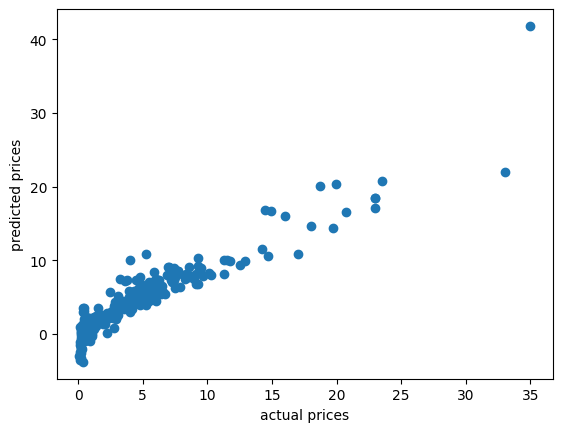

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')


In [23]:
#predicting for test data
test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('R squared Value is  :',error_score)

R squared Value is  : 0.8365766715027051


Text(0, 0.5, 'predicted prices')

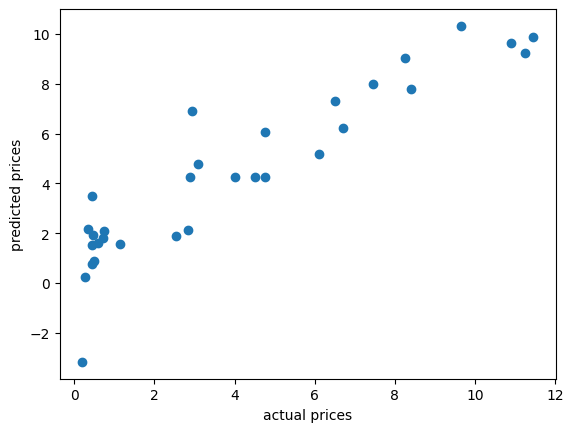

In [24]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')


LASSO REGRESSION

In [25]:
lasso_reg_model= Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [26]:
training_data_prediction = lasso_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('Error scode is :',error_score)

Error scode is : 0.8427856123435794


In [29]:
training_data_prediction = lin_reg_model.predict(X_train)

In [30]:
train_data_prediction = lasso_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train , train_data_prediction)
print('R squared Value is  :',error_score)

R squared Value is  : 0.8427856123435794


Text(0, 0.5, 'predicted prices')

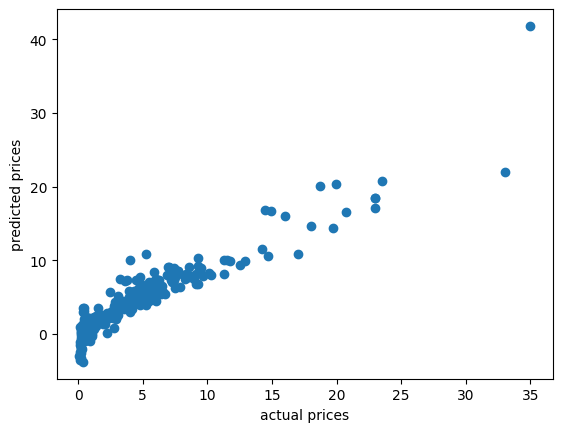

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')

In [27]:
test_data_prediction = lasso_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test , test_data_prediction)
print('R squared Value is  :',error_score)

R squared Value is  : 0.8709167941173195


Text(0, 0.5, 'predicted prices')

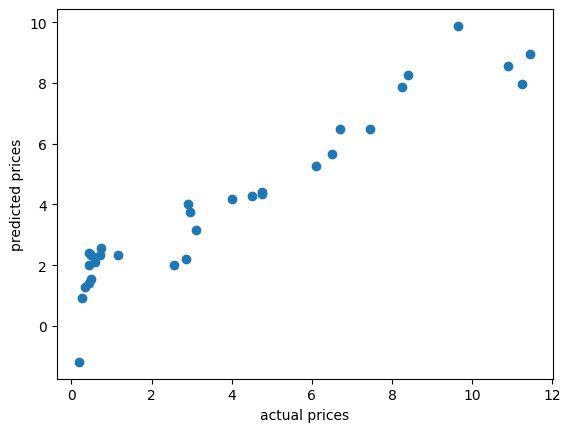

In [28]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')


Random Forest

In [38]:
random_model = RandomForestRegressor()
random_model.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
training_data_prediction = random_model.predict(X_train)

In [43]:
error_score = metrics.r2_score(Y_train,train_data_prediction)
print('the r squared error is :',error_score)

the r squared error is : 0.8427856123435794


In [45]:
test_data_prediction = random_model.predict(X_test)
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("The R squared error is :",error_score)

The R squared error is : 0.9834828668529022


Text(0, 0.5, 'predicted value')

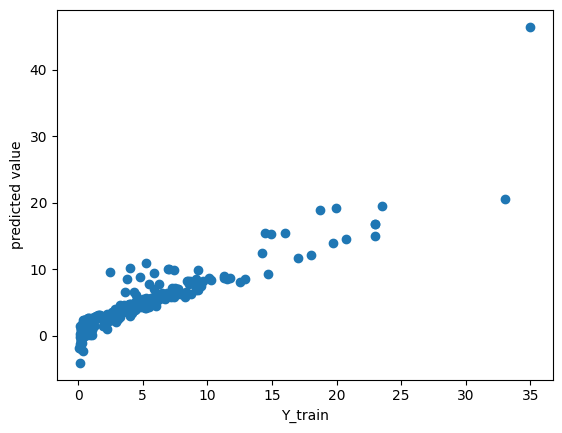

In [52]:
plt.scatter(Y_train,train_data_prediction)
plt.xlabel('Y_train')
plt.ylabel('predicted value')

Text(0, 0.5, 'prediction')

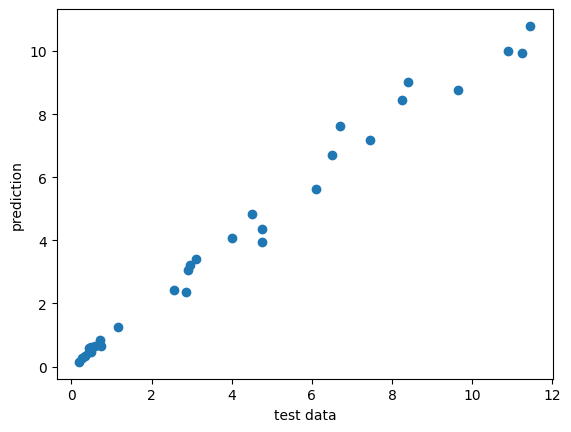

In [53]:
plt.scatter(Y_test , test_data_prediction)
plt.xlabel('test data')
plt.ylabel('prediction')

In [55]:
svr_model = SVR()

In [58]:
svr_model.fit(X_train , Y_train)

SVR()

In [60]:
train_data_prediction = svr_model.predict(X_train)
error_score = metrics.r2_score(Y_train , train_data_prediction)
print('R2 Score is : ', error_score)

R2 Score is :  -0.07757296966916716


In [61]:
test_data_prediction =  svr_model.predict(X_test)
error_score = metrics.r2_score(Y_test , test_data_prediction)
print("error score is :", error_score)

error score is : 0.10854097603356638


Text(0, 0.5, 'predicted data')

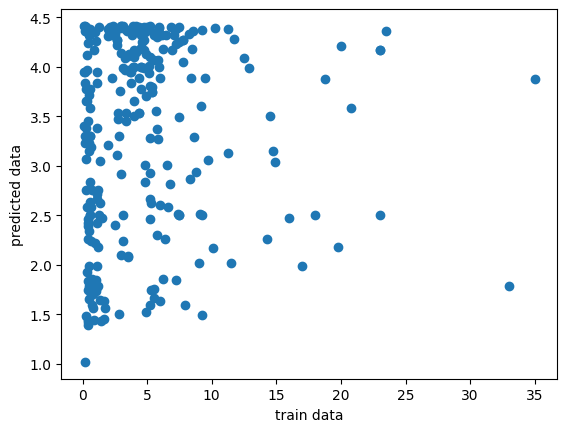

In [64]:
plt.scatter(Y_train , train_data_prediction)
plt.xlabel('train data')
plt.ylabel('predicted data')


Text(0, 0.5, 'predicted data')

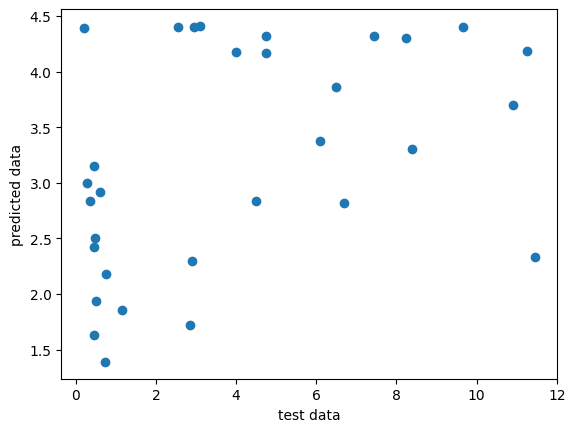

In [65]:
plt.scatter(Y_test , test_data_prediction)
plt.xlabel('test data')
plt.ylabel('predicted data')